In [3]:
# Import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report, roc_auc_score, precision_recall_curve, accuracy_score, precision_score, recall_score


In [4]:
df = pd.read_csv('Mobile_Device_Usage (1).csv')
df.shape

(700, 11)

In [5]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [6]:
df.drop(['User ID'], axis=1, inplace=True)
df.head

<bound method NDFrame.head of            Device Model Operating System  App Usage Time (min/day)  \
0        Google Pixel 5          Android                       393   
1             OnePlus 9          Android                       268   
2          Xiaomi Mi 11          Android                       154   
3        Google Pixel 5          Android                       239   
4             iPhone 12              iOS                       187   
..                  ...              ...                       ...   
695           iPhone 12              iOS                        92   
696        Xiaomi Mi 11          Android                       316   
697      Google Pixel 5          Android                        99   
698  Samsung Galaxy S21          Android                        62   
699           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                           6.4                     1872   
1        

In [7]:
df['Gender'] = df['Gender'].factorize()[0] # label encoding
df['Device Model'] = df['Device Model'].factorize()[0]
df['Operating System'] = df['Operating System'].factorize()[0]
df.head

<bound method NDFrame.head of      Device Model  Operating System  App Usage Time (min/day)  \
0               0                 0                       393   
1               1                 0                       268   
2               2                 0                       154   
3               0                 0                       239   
4               3                 1                       187   
..            ...               ...                       ...   
695             3                 1                        92   
696             2                 0                       316   
697             0                 0                        99   
698             4                 0                        62   
699             1                 0                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                           6.4                     1872   
1                           4.7                     1331   
2        

Depth = 1, train_acc = 0.4204, eval_acc = 0.3429
Depth = 2, train_acc = 0.8143, eval_acc = 0.7905
Depth = 3, train_acc = 1.0000, eval_acc = 0.9905
Depth = 4, train_acc = 1.0000, eval_acc = 1.0000
Depth = 5, train_acc = 1.0000, eval_acc = 1.0000
Depth = 6, train_acc = 1.0000, eval_acc = 1.0000
Depth = 7, train_acc = 1.0000, eval_acc = 1.0000
Depth = 8, train_acc = 1.0000, eval_acc = 1.0000


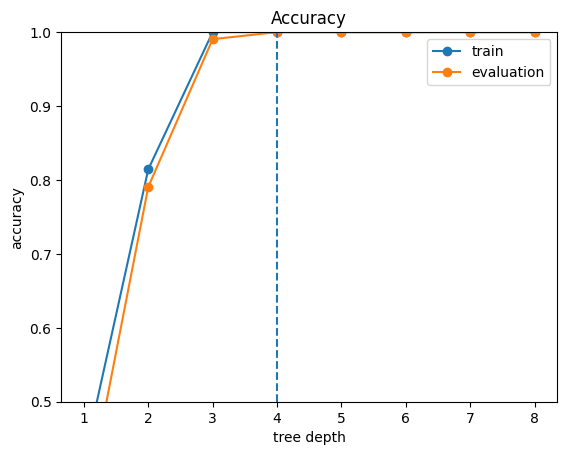

In [8]:
# Separate the Titanic data into features and target class.
y = df['User Behavior Class']
x = df.drop('User Behavior Class', axis=1)

# Split the data into training, validation and test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5)

# Create decision tree models of various depths, 
# and measure the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(x_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    # Measure the accuracy of this model using the validation data.
    y_pred = model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest accuracy of validation data.
opt_depth = np.argmax(eval_acc) + 1

# Visualize accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

Optimal depth = 4, test_acc = 1.0000


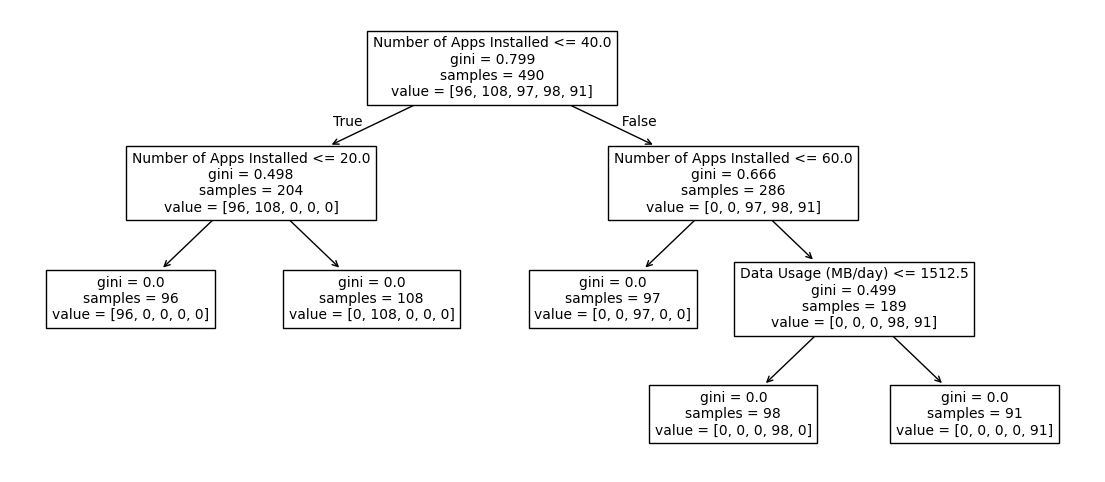

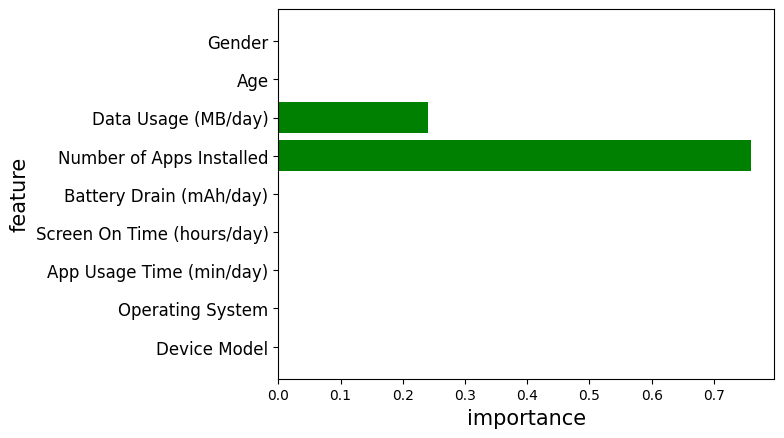

feature importance = [0.    0.    0.    0.    0.    0.759 0.241 0.    0.   ]


In [9]:
# I set max_step=3 as a constant value for tree visualization.
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

# Use test data to evaluate final performance.
y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))
        
# Visualize the tree
# plt.figure(figsize=(20,10))
feat_names = x.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()

# Analyze the importance of features.
feature_importance = model.feature_importances_
n_feature = x_train.shape[1]
idx = np.arange(n_feature)

plt.barh(idx, feature_importance, align='center', color='green')
plt.yticks(idx, feat_names, size=12)
plt.xlabel('importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

print('feature importance = {}'.format(feature_importance.round(3)))

In [14]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 10)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1.         1.         1.         0.93333333 0.93333333 0.86666667
 1.         0.86666667 0.93333333 1.        ]
Average CV Score:  0.9533333333333334
Number of CV Scores used in Average:  10


In [10]:
# Train a CART model (Decision Tree Classifier)
cart_model = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=None)
cart_model.fit(x_train_balanced, y_train_balanced)

# Predictions and evaluation for CART
y_pred_cart = cart_model.predict(x_test_scaled)
y_pred_cart_proba = cart_model.predict_proba(x_test_scaled)[:, 1]

# Evaluate CART
print("CART Classification Report:")
print(classification_report(y_test, y_pred_cart))
print(f"CART AUC-ROC Score: {roc_auc_score(y_test, y_pred_cart_proba):.4f}")

NameError: name 'x_train_balanced' is not defined

In [11]:
# CART (Decision Tree) Predictions
y_pred_cart = cart_model.predict(x_test_scaled)
y_pred_cart_proba = cart_model.predict_proba(x_test_scaled)[:, 1]

# Function to plot confusion matrix for CART
plot_confusion_matrix(y_test, y_pred_cart, "CART (Decision Tree)")

# ROC Curve for CART
plot_roc_curve(y_test, y_pred_cart_proba, "CART (Decision Tree)")

# Precision-Recall Curve for CART
plot_precision_recall_curve(y_test, y_pred_cart_proba, "CART (Decision Tree)")

# Feature Importance for CART
plot_feature_importance(cart_model, x.columns, "CART (Decision Tree)")

NameError: name 'x_test_scaled' is not defined

attempt 2


Depth = 1, train_acc = 0.4388, eval_acc = 0.3619
Depth = 2, train_acc = 0.6286, eval_acc = 0.6190
Depth = 3, train_acc = 1.0000, eval_acc = 1.0000
Depth = 4, train_acc = 1.0000, eval_acc = 1.0000
Depth = 5, train_acc = 1.0000, eval_acc = 1.0000
Depth = 6, train_acc = 1.0000, eval_acc = 1.0000
Depth = 7, train_acc = 1.0000, eval_acc = 1.0000
Depth = 8, train_acc = 1.0000, eval_acc = 1.0000


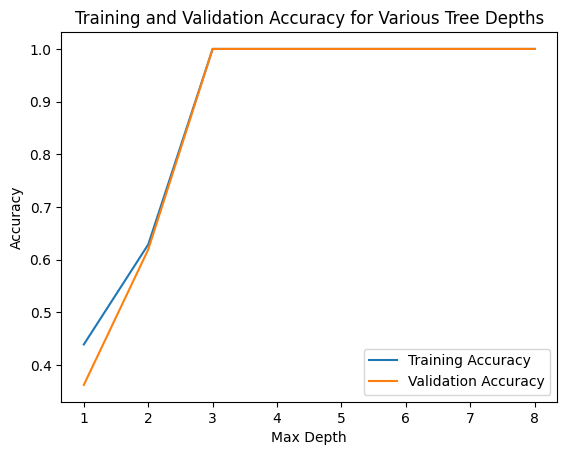

Test Accuracy (Depth=3): 1.0000


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

df = pd.read_csv('Mobile_Device_Usage (1).csv')

df['Gender'] = df['Gender'].factorize()[0] # label encoding
df['Device Model'] = df['Device Model'].factorize()[0]
df['Operating System'] = df['Operating System'].factorize()[0]

df.drop(['User ID'], axis=1, inplace=True)

# Separate the Titanic data into features and target class.
y = df['User Behavior Class']  # Target variable
X = df.drop('User Behavior Class', axis=1)  # Features

# Split the data into training, validation, and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test, X_eval, y_test, y_eval = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Create decision tree models of various depths, 
# and measure the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth + 1):
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    y_train_pred = model.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    
    # Measure the accuracy of this model using the validation data.
    y_eval_pred = model.predict(X_eval)
    eval_acc.append(accuracy_score(y_eval, y_eval_pred))
    
    print(f'Depth = {d}, train_acc = {train_acc[-1]:.4f}, eval_acc = {eval_acc[-1]:.4f}')

# Plot the results to visualize the accuracy of models for each depth.
plt.plot(range(1, max_depth + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, max_depth + 1), eval_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Various Tree Depths')
plt.legend()
plt.show()

# Evaluate the final model on the test data.
best_depth = train_acc.index(max(train_acc)) + 1  # Choose the depth with best train accuracy
best_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_model.fit(X_train, y_train)

# Test accuracy
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy (Depth={best_depth}): {test_accuracy:.4f}')


Depth = 1, train_acc = 0.4388, eval_acc = 0.3619
Depth = 2, train_acc = 0.6286, eval_acc = 0.6190
Depth = 3, train_acc = 1.0000, eval_acc = 1.0000
Depth = 4, train_acc = 1.0000, eval_acc = 1.0000
Depth = 5, train_acc = 1.0000, eval_acc = 1.0000
Depth = 6, train_acc = 1.0000, eval_acc = 1.0000
Depth = 7, train_acc = 1.0000, eval_acc = 1.0000
Depth = 8, train_acc = 1.0000, eval_acc = 1.0000


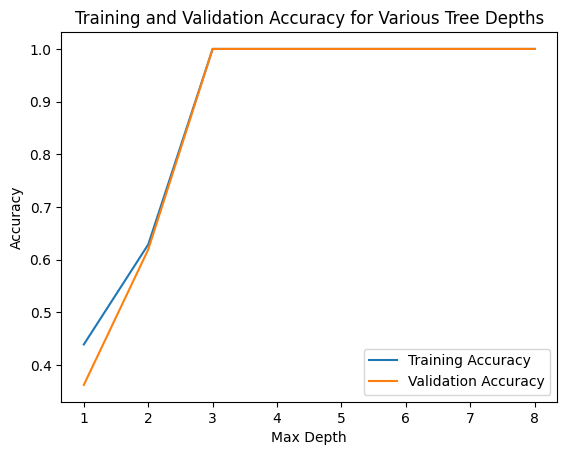

TypeError: can only concatenate str (not "numpy.int64") to str

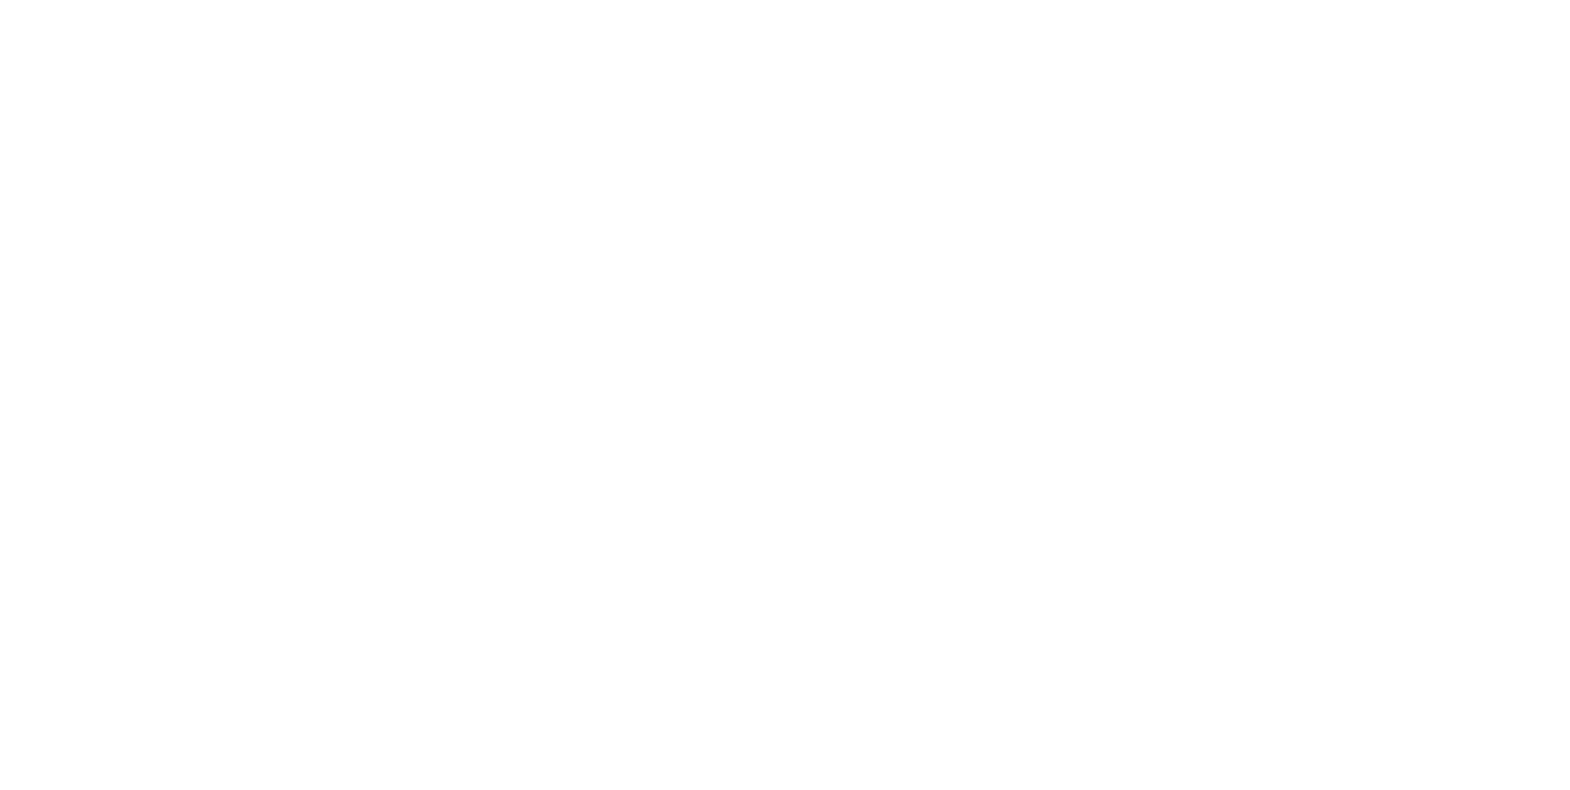

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

df = pd.read_csv('Mobile_Device_Usage (1).csv')

df['Gender'] = df['Gender'].factorize()[0] # label encoding
df['Device Model'] = df['Device Model'].factorize()[0]
df['Operating System'] = df['Operating System'].factorize()[0]

df.drop(['User ID'], axis=1, inplace=True)


# Separate the Titanic data into features and target class.
y = df['User Behavior Class']  # Target variable
X = df.drop('User Behavior Class', axis=1)  # Features

# Split the data into training, validation, and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Create decision tree models of various depths, 
# and measure the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth + 1):
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    y_train_pred = model.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    
    # Measure the accuracy of this model using the validation data.
    y_eval_pred = model.predict(X_eval)
    eval_acc.append(accuracy_score(y_eval, y_eval_pred))
    
    print(f'Depth = {d}, train_acc = {train_acc[-1]:.4f}, eval_acc = {eval_acc[-1]:.4f}')

# Plot the training and validation accuracy
plt.plot(range(1, max_depth + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, max_depth + 1), eval_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Various Tree Depths')
plt.legend()
plt.show()

# Now, visualize the tree for the best depth
best_depth = train_acc.index(max(train_acc)) + 1  # Choose the depth with best train accuracy
best_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_model.fit(X_train, y_train)

# Plot the tree structure
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True)
plt.title(f"Decision Tree Structure (Depth={best_depth})")
plt.show()

# Get Feature Importance
feature_importances = best_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# Evaluate the final model on the test data
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy (Depth={best_depth}): {test_accuracy:.4f}')
